# NHANES 2021-2023 Inferential Analytics Assignment

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Demographics
demographic_path = 'DEMO_L.XPT'
demo = pd.read_sas(demographic_path, format='xport') #, encoding='latin1')  # Try 'latin1' or 'iso-8859-1' if UTF-8 fails
demo

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,12.0,2.0,1.0,9.0,NaN,2.0,2.0,1.0,111.0,...,1.0,3.0,3.0,3.0,NaN,11147.192563,13459.129019,176.0,1.0,2.01
11929,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,69419.620456,64962.328962,181.0,1.0,NaN
11930,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,32696.313477,44367.534132,183.0,2.0,1.95
11931,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,30547.974564,46249.361849,176.0,1.0,3.11


In [20]:
# Weight History
weight_path = 'WHQ_L.XPT'
weight = pd.read_sas(weight_path, format='xport')
weight

,SEQN,WHD010,WHD020,WHD050,WHQ070
0,130378.0,71.0,190.0,200.0,1.0
1,130379.0,70.0,220.0,220.0,2.0
2,130380.0,60.0,150.0,165.0,1.0
3,130384.0,68.0,204.0,212.0,1.0
4,130385.0,70.0,240.0,240.0,2.0
...,...,...,...,...,...
8496,142305.0,61.0,137.0,134.0,2.0
8497,142307.0,61.0,206.0,235.0,1.0
8498,142308.0,69.0,174.0,180.0,1.0
8499,142309.0,69.0,200.0,170.0,2.0


In [23]:
# Physical Activity
activity_path = 'PAQ_L.XPT'
activity = pd.read_sas(activity_path, format='xport')
activity

,SEQN,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680
0,130378.0,3.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,360.0
1,130379.0,4.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,480.0
2,130380.0,1.000000e+00,b'W',20.0,5.397605e-79,b'',NaN,240.0
3,130384.0,5.397605e-79,b'',NaN,5.397605e-79,b'',NaN,60.0
4,130385.0,1.000000e+00,b'D',90.0,1.000000e+00,b'W',60.0,180.0
...,...,...,...,...,...,...,...,...
8148,142305.0,2.000000e+00,b'W',40.0,5.397605e-79,b'',NaN,480.0
8149,142307.0,3.000000e+00,b'W',15.0,5.397605e-79,b'',NaN,480.0
8150,142308.0,1.000000e+00,b'W',45.0,5.397605e-79,b'',NaN,600.0
8151,142309.0,2.000000e+00,b'D',15.0,5.397605e-79,b'',NaN,240.0


In [28]:
# Survey Data - Hospital Utilization and Access to Care
survey_huq_path = 'HUQ_L.XPT'
access = pd.read_sas(survey_huq_path, format='xport')
access

,SEQN,HUQ010,HUQ030,HUQ042,HUQ055,HUQ090
0,130378.0,1.0,1.0,1.0,2.0,2.0
1,130379.0,3.0,1.0,1.0,1.0,2.0
2,130380.0,3.0,1.0,1.0,1.0,2.0
3,130381.0,1.0,1.0,1.0,2.0,2.0
4,130382.0,3.0,1.0,1.0,2.0,NaN
...,...,...,...,...,...,...
11928,142306.0,1.0,2.0,NaN,2.0,2.0
11929,142307.0,3.0,1.0,1.0,2.0,2.0
11930,142308.0,2.0,2.0,NaN,2.0,2.0
11931,142309.0,1.0,1.0,4.0,2.0,2.0


In [29]:
# Plasma Fasting Glucose
fasting_glucose_path = 'GLU_L.XPT'
glucose = pd.read_sas(fasting_glucose_path, format='xport')
glucose

,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI
0,130378.0,1.200253e+05,113.0,6.27
1,130379.0,5.397605e-79,99.0,5.50
2,130380.0,1.450908e+05,156.0,8.66
3,130386.0,8.259962e+04,100.0,5.55
4,130394.0,1.004203e+05,88.0,4.88
...,...,...,...,...
3991,142301.0,3.112337e+04,110.0,6.11
3992,142303.0,1.095823e+05,160.0,8.88
3993,142305.0,8.479001e+04,132.0,7.33
3994,142308.0,5.397605e-79,NaN,NaN


In [30]:
# C-Reactive Protein
crp_path = 'HSCRP_L.XPT'
crp = pd.read_sas(crp_path, format='xport')
crp

,SEQN,WTPH2YR,LBXHSCRP,LBDHRPLC
0,130378.0,5.604213e+04,1.78,5.397605e-79
1,130379.0,3.743571e+04,2.03,5.397605e-79
2,130380.0,8.532884e+04,5.62,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN
...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN
8723,142307.0,6.899418e+04,4.30,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN
8725,142309.0,4.628442e+04,0.53,5.397605e-79


In [31]:
# Body Measures
body_path = 'BMX_L.XPT'
body = pd.read_sas(body_path, format='xport')
body

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,130378.0,1.0,86.9,NaN,NaN,NaN,NaN,NaN,179.5,NaN,...,42.8,NaN,42.0,NaN,35.7,NaN,98.3,NaN,102.9,NaN
1,130379.0,1.0,101.8,NaN,NaN,NaN,NaN,NaN,174.2,NaN,...,38.5,NaN,38.7,NaN,33.7,NaN,114.7,NaN,112.4,NaN
2,130380.0,1.0,69.4,NaN,NaN,NaN,NaN,NaN,152.9,NaN,...,38.5,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN
3,130381.0,1.0,34.3,NaN,NaN,NaN,NaN,NaN,120.1,NaN,...,NaN,NaN,25.4,NaN,23.4,NaN,70.4,NaN,NaN,NaN
4,130382.0,3.0,13.6,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,142306.0,1.0,25.3,NaN,NaN,NaN,NaN,NaN,128.0,NaN,...,32.0,NaN,25.0,NaN,19.0,NaN,57.7,NaN,NaN,NaN
8856,142307.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,143.8,NaN,...,NaN,1.0,34.0,NaN,35.4,NaN,NaN,1.0,NaN,1.0
8857,142308.0,1.0,79.3,NaN,NaN,NaN,NaN,NaN,173.3,NaN,...,41.8,NaN,40.0,NaN,30.6,NaN,98.4,NaN,97.7,NaN
8858,142309.0,1.0,81.9,NaN,NaN,NaN,NaN,NaN,179.1,NaN,...,44.0,NaN,40.0,NaN,30.8,NaN,96.0,NaN,103.3,NaN


In [32]:
# Blood Pressure
bp_path = 'BPXO_L.XPT'
bp = pd.read_sas(bp_path, format='xport')
bp

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7796,142306.0,b'R',2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,142307.0,b'R',4.0,127.0,75.0,132.0,73.0,131.0,72.0,71.0,70.0,67.0
7798,142308.0,b'R',3.0,106.0,65.0,106.0,69.0,112.0,74.0,58.0,61.0,69.0
7799,142309.0,b'R',3.0,127.0,81.0,125.0,82.0,128.0,81.0,80.0,79.0,83.0


In [10]:
demo['DMDMARTZ'] = demo['DMDMARTZ'].map({1: 'Married', 2: 'Not Married'})

In [11]:
demo['DMDEDUC2'] = demo['DMDEDUC2'].map({5: "Bachelor's or Higher", 1: 'Less than Bachelor’s', 2: 'Less than Bachelor’s'})


In [12]:
demo['RIDAGEYR'].describe()


,RIDAGEYR
count,1.193300e+04
mean,3.831786e+01
std,2.560199e+01
min,5.397605e-79
25%,1.300000e+01
50%,3.700000e+01
75%,6.200000e+01
max,8.000000e+01


In [24]:
activity['PAD680'] = activity['PAD680'].replace([7777, 9999], np.nan)
activity['PAD680'].dropna(inplace=True)

In [22]:
weight['WHD020'] = weight['WHD020'].replace([7777, 9999], np.nan)
weight['WHD020'].dropna(inplace=True)


In [33]:
demo[['DMDMARTZ', 'DMDEDUC2', 'RIDAGEYR']].info()
demo[['DMDMARTZ', 'DMDEDUC2']].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DMDMARTZ  7792 non-null   float64
 1   DMDEDUC2  7794 non-null   float64
 2   RIDAGEYR  11933 non-null  float64
dtypes: float64(3)
memory usage: 279.8 KB


DMDMARTZ  DMDEDUC2
1.0       5.0         1631
          4.0         1151
          3.0          842
2.0       4.0          692
3.0       4.0          525
2.0       3.0          523
3.0       5.0          517
2.0       5.0          473
3.0       3.0          382
1.0       2.0          302
2.0       2.0          210
1.0       1.0          208
3.0       2.0          152
2.0       1.0          117
3.0       1.0           47
2.0       9.0            7
1.0       9.0            2
3.0       9.0            2
77.0      5.0            2
99.0      2.0            2
          5.0            2
77.0      3.0            1
          4.0            1
99.0      1.0            1
Name: count, dtype: int64

## Question 1
### Association between Marital Status and Education Level

The chi-square test reveals a significant association between marital status and education level, with a p-value of 1.1485405257909855e-31. This suggests that marital status and education level are related in this dataset.

In [34]:
# Question 1
contingency_table = pd.crosstab(demo['DMDMARTZ'], demo['DMDEDUC2'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test:\n Chi2 = {chi2}, p-value = {p}')

Chi-Square Test:
 Chi2 = 199.95521135886386, p-value = 1.1485405257909855e-31


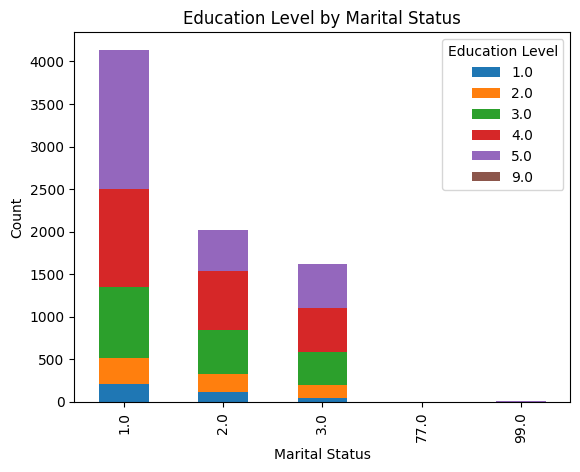

In [69]:
contingency_table.plot(kind="bar", stacked=True)
plt.title("Education Level by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Education Level")
plt.show()

## Question 2
### Difference in Mean Sedentary Behavior TIme by Marital Status

*Could not get code to work*

In [38]:
# Question 2
married = activity[demo['DMDMARTZ'] == 'Married']['PAD680']
not_married = activity[demo['DMDMARTZ'] == 'Not Married']['PAD680']
t_stat, p_val = ttest_ind(married, not_married)
print(f'T-test:\n t-stat = {t_stat}, p-value = {p_val}')

T-test:
 t-stat = nan, p-value = nan


<ipython-input-38-a58b063ae683>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  married = activity[demo['DMDMARTZ'] == 'Married']['PAD680']
<ipython-input-38-a58b063ae683>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_married = activity[demo['DMDMARTZ'] == 'Not Married']['PAD680']


In [92]:
married = merged_df[merged_df['DMDMARTZ'] == 'Married']['PAD680']
not_married = merged_df[merged_df['DMDMARTZ'] == 'Not Married']['PAD680']

KeyError: 'DMDMARTZ'

In [93]:
# Visualization with regression lines
sns.lmplot(data=merged_df, x='RIDAGEYR', y='BPXOSY3', hue='DMDMARTZ', aspect=1.5, height=6)
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.title("Effect of Age and Marital Status on Systolic Blood Pressure")
plt.show()

KeyError: "['DMDMARTZ', 'RIDAGEYR'] not in index"

## Question 3 Summary
### Effect of Age and Marital Status on Systolic Blood Pressure

*Could not get code to work*

In [81]:
# Question 3
merged_df = pd.merge(demo, bp, on='SEQN')

In [82]:
merged_df.head()

,SEQN,DMDEDUC2,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,Bachelor's or Higher,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,Bachelor's or Higher,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,Less than Bachelor’s,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,Less than Bachelor’s,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,Bachelor's or Higher,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


In [94]:
merged_df['AgeGroup'] = pd.cut(merged_df['RIDAGEYR'], bins=[0, 30, 50, 80], labels=['Young', 'Middle-Aged', 'Older'])

KeyError: 'RIDAGEYR'

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BPXOSY3 ~ C(DMDMARTZ) + RIDAGEYR', data=merged_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                   sum_sq      df           F         PR(>F)
C(DMDMARTZ)  3.494985e+03     4.0    2.990517   1.771278e-02
RIDAGEYR     2.307946e+05     1.0  789.926300  4.045394e-163
Residual     1.705118e+06  5836.0         NaN            NaN


In [79]:
print(demo.columns)
print(bp.columns)

Index(['SEQN', 'DMDEDUC2'], dtype='object')
Index(['SEQN', 'BPAOARM', 'BPAOCSZ', 'BPXOSY1', 'BPXODI1', 'BPXOSY2',
       'BPXODI2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3'],
      dtype='object')


## Question 4 Summary
### Correlation between Self-Reported Weight and Sedentary Behavior:

The correlation coefficient indicates that there is a slight positive relationship (as weight increases, Sedentary behavior increases) but the relationship is non-significant because there is a p-value of 1.6988498386828133e-44.

In [53]:
# Question 4
weight['WHD020'] = weight['WHD020'].replace([7777, 9999], np.nan)
weight = weight.dropna(subset=['WHD020'])

activity['PAD680'] = activity['PAD680'].replace([7777, 9999], np.nan)
activity = activity.dropna(subset=['PAD680'])

In [55]:
weight = weight[['SEQN', 'WHD020']]
activity = activity[['SEQN', 'PAD680']]

In [56]:
merged = pd.merge(weight, activity, on='SEQN')

In [58]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(merged['WHD020'], merged['PAD680'])
print(f'Correlation between self-reported weight and sedentary behavior time:\nCorrelation coefficient = {corr}, p-value = {p_value}')

Correlation between self-reported weight and sedentary behavior time:
Correlation coefficient = 0.1559714584645021, p-value = 1.6988498386828133e-44


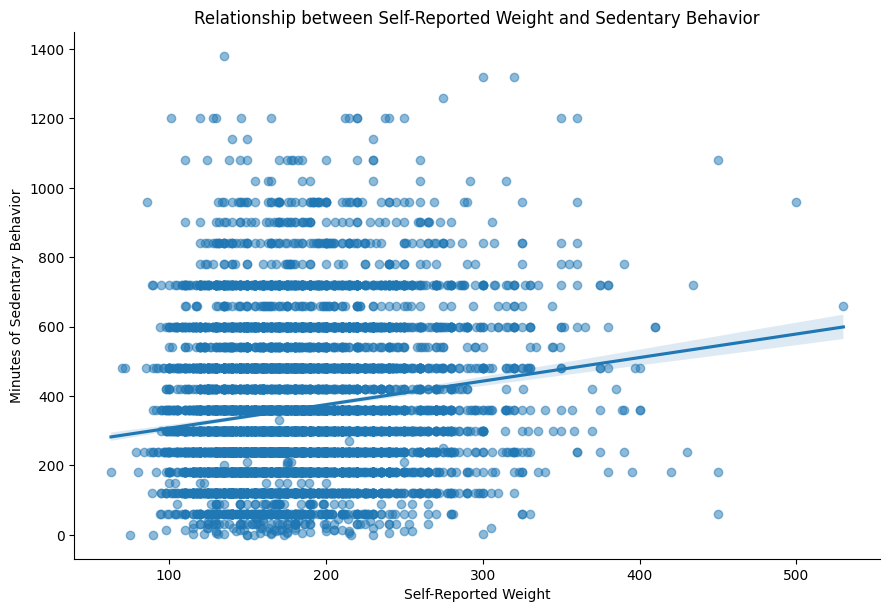

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(data=merged, x='WHD020', y='PAD680', height=6, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.xlabel('Self-Reported Weight')
plt.ylabel('Minutes of Sedentary Behavior')
plt.title('Relationship between Self-Reported Weight and Sedentary Behavior')
plt.show()

## Question 5
### Association between education level and plasma fasting glucose:

The t-test results indicate that there is a non-significant difference in mean plasma fasting glucose levels between individuals with and without a bachelor’s degree, with a p-value of 6.215940775928377e-16.


In [60]:
# Question 5
demo['DMDEDUC2'] = demo['DMDEDUC2'].map({
    5: "Bachelor's or Higher",
    1: "Less than Bachelor’s",
    2: "Less than Bachelor’s",
    3: "Less than Bachelor’s",
    4: "Less than Bachelor’s"
})

In [61]:
demo = demo[['SEQN', 'DMDEDUC2']]
glucose = glucose[['SEQN', 'LBXGLU']]

In [62]:
merged_df = pd.merge(demo, glucose, on='SEQN')

In [63]:
merged_df.head()

,SEQN,DMDEDUC2,LBXGLU
0,130378.0,Bachelor's or Higher,113.0
1,130379.0,Bachelor's or Higher,99.0
2,130380.0,Less than Bachelor’s,156.0
3,130386.0,Less than Bachelor’s,100.0
4,130394.0,Bachelor's or Higher,88.0


In [64]:
bachelors_or_higher = merged_df[merged_df['DMDEDUC2'] == "Bachelor's or Higher"]['LBXGLU']
less_than_bachelors = merged_df[merged_df['DMDEDUC2'] == 'Less than Bachelor’s']['LBXGLU']

In [65]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(bachelors_or_higher.dropna(), less_than_bachelors.dropna(), equal_var=False)
print(f"T-test results:\nT-statistic = {t_stat}, P-value = {p_value}")

T-test results:
T-statistic = -8.127021435685405, P-value = 6.215940775928377e-16


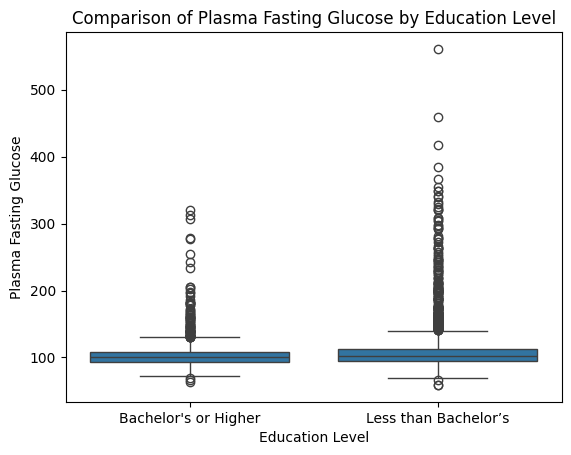

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of plasma fasting glucose by education level
sns.boxplot(x='DMDEDUC2', y='LBXGLU', data=merged_df)
plt.xlabel('Education Level')
plt.ylabel('Plasma Fasting Glucose')
plt.title('Comparison of Plasma Fasting Glucose by Education Level')
plt.show()